# Домашнее задание №2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

## Часть 1 - Деревья решений (30%)

### 1.1. Самостоятельное написание дерева решений  (10%)
Источник: [mlcourse.ai](https://mlcourse.ai) от [Юрия Кашницкого](https://yorko.github.io) и [OpenDataScience](https://ods.ai)

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, нужно построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. 

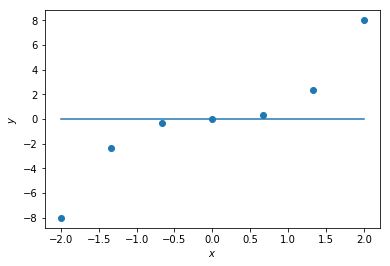

In [4]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.plot(np.linspace(-2,2,50), np.linspace(np.mean(y),np.mean(y),50))
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

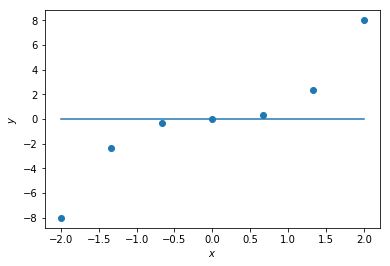

In [7]:
# Ваш Код здесь
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.plot(np.linspace(-2,2,50), np.linspace(np.mean(y),np.mean(y),50))
plt.ylabel(r'$y$');

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

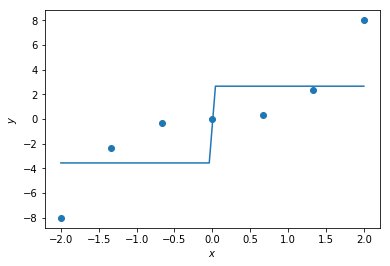

In [54]:
# Ваш Код здесь
X = np.linspace(-2, 2, 7)
y = X ** 3
plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.plot(np.linspace(-2,2,50), np.concatenate((np.linspace(np.mean(y[:3]),np.mean(y[:3]),25), 
                                                          np.linspace(np.mean(y[3:]),np.mean(y[3:]),25))))
plt.ylabel(r'$y$');

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий: $$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$ где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[xj < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$: $$D(X) = \dfrac{1}{|X|} \sum{x_j \in X}(yj – \dfrac{1}{|X|}\sum{x_i \in X}y_i)^2,$$ где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине).

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

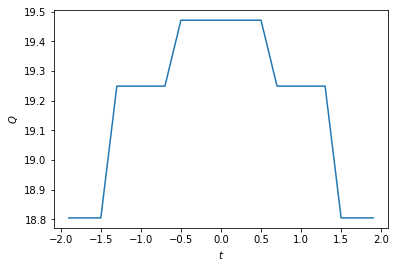

In [62]:
# Ваш Код здесь

X = np.linspace(-2, 2, 7)
y = X ** 3

D0 = np.sum(y**2)/len(y)
T = np.linspace(-1.9, 1.9, 20)
Q = []
for t in T:
    l = []
    r = []
    for x in X:
        if x < t:
            l.append(x)
        else: 
            r.append(x)
    Q.append(D0 - np.sum((l - np.mean(l))**2)/len(X) - np.sum((r - np.mean(r))**2)/len(X))

    
plt.xlabel(r'$t$')
plt.plot(T, Q)
plt.ylabel(r'$Q$');

### 1.2. Применение дерева решений на реальных данных (20%)

Для работы возьмем данные из соревания [Employee Access Challenge](https://www.kaggle.com/c/amazon-employee-access-challenge/), проводимое Amazon.com.  
Скачайте данные и прочитайте подробное описание задачи и признаков на странице конкурса.

In [87]:
train = pd.read_csv('train.csv')
X = train.drop('ACTION', axis=1)
Y = train['ACTION'].values

Разделим выборку на обучающую (80%) и тестовую (20%) - обязательно укажите параметр `random_state=42`

In [3]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

Обучите решающее дерево с параметрами по умолчанию и проверьте качество на отложенной выборке. в качестве метрики будем испольовать ROC AUC.  
Единственный параметр который мы будем использовать - random_state=42. 

In [74]:
# Ваш Код здесь
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
roc_auc_score(clf.predict(x_val), y_val)

0.6681624394969969

Посмотрите какие параметре есть у дерева и прочтите в документации о каждом из них. 
Один из параметров - критерий разбиения он может принимать значения 'gini' или 'entropy'
Другой важный параметр: глубина дерева. 

Вашим заданием, будет построить графики зависимости ROC AUC в зависимости от критерия разбиения и глубины дерева. 
Давайте договоримся, что смотреть будем глубину начиная с 1 и заканчивая 40 (включая обе границы)
Не забудьте установить random_state=42 

In [163]:
%%time
clf = DecisionTreeClassifier(random_state=42)
param_grid={
    'max_depth': np.linspace(1, 40, 40),
    'criterion': ['gini', 'entropy']
    }
gs = GridSearchCV(clf, param_grid=param_grid, cv=5,
                n_jobs=-1, scoring='roc_auc') 
gs.fit(x_train, y_train)

CPU times: user 596 ms, sys: 93.7 ms, total: 690 ms
Wall time: 7.15 s


In [164]:
def print_cv_results(a, len_gs, params, param_r, param_sep): 
    d = len(params['param_grid'][param_sep])
    ar=np.array(a).reshape(d, len_gs).T
    df=pd.DataFrame(ar)

    pen_par=params['param_grid'][param_sep]
    c_par=params['param_grid'][param_r]
    if type(c_par) != list: 
        c_par = c_par.tolist()
    columns_mapper=dict(zip(range(0, len(pen_par)),pen_par))
    row_mapper=dict(zip(range(0, len(c_par)), c_par))

    df.rename(columns=columns_mapper, index=row_mapper, inplace=True)

    plot = df.plot(title='Mean accuracy rating',grid=True)
    plot.set_xlabel(param_r, fontsize=13)
    plot.set_ylabel('roc_auc', rotation=0, fontsize=13, labelpad=15)

{'criterion': 'entropy', 'max_depth': 10.0}

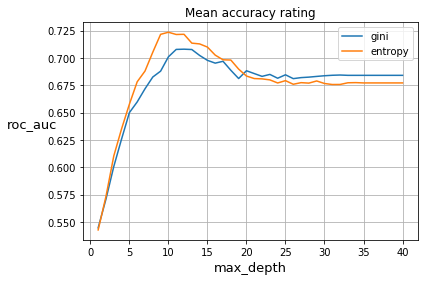

In [165]:
print_cv_results(gs.cv_results_['mean_test_score'],
                 40, gs.get_params(), 'max_depth','criterion')
gs.best_params_

In [152]:
#print(gs.cv_results_['mean_test_score'])

[0.54459898 0.63969911 0.68903505 0.68910787 0.6825408  0.67237785
 0.67198626 0.67115159 0.67295251 0.67295251 0.54500105 0.65543023
 0.70652769 0.70647715 0.6889743  0.67910076 0.67794211 0.67877758
 0.67877758 0.67877758]


In [153]:
#print(np.array(gs.cv_results_['mean_test_score']).reshape(10, 2))

[[0.54459898 0.63969911]
 [0.68903505 0.68910787]
 [0.6825408  0.67237785]
 [0.67198626 0.67115159]
 [0.67295251 0.67295251]
 [0.54500105 0.65543023]
 [0.70652769 0.70647715]
 [0.6889743  0.67910076]
 [0.67794211 0.67877758]
 [0.67877758 0.67877758]]


Дерево с какими параметрами, дало наилучший результат? Какие это параметры? Обучите его. 

In [169]:
best_clf = DecisionTreeClassifier(random_state=42, 
                                  criterion=gs.best_params_['criterion'], 
                                  max_depth=gs.best_params_['max_depth'])
best_clf.fit(x_train, y_train)
roc_auc_score(best_clf.predict(x_val), y_val)

0.6775557611549161

## Часть 2 - Случайный лес (20%)

### 2.1. Bagging (10%)
Обучите BaggingClassifier с параметрами по умолчанию (random_state=42)  
В качестве базового алгоритма, используйте дерево с лучшими параметрами из предыдущего задания.


In [170]:
%%time
# Ваш Код здесь
bag_of_trees = BaggingClassifier(best_clf, n_estimators=20, random_state=42)

CPU times: user 35 µs, sys: 19 µs, total: 54 µs
Wall time: 58.2 µs


In [171]:
bag_of_trees.fit(x_train, y_train)
roc_auc_score(bag_of_trees.predict(x_val), y_val)

0.7759855414629266

Подберите, любым известным Вам способом, оптимальное количество базовых алгоритмов.

In [183]:
%%time
bag_of_trees = BaggingClassifier(best_clf, random_state=42)
param_grid={
    'n_estimators': np.linspace(100, 200, 4).astype(int)
    }
gs = GridSearchCV(bag_of_trees, param_grid=param_grid, cv=3,
                n_jobs=-1, scoring='roc_auc') 
gs.fit(x_train, y_train)

CPU times: user 10.4 s, sys: 22 ms, total: 10.4 s
Wall time: 28.2 s


In [185]:
gs.best_params_
#print(gs.cv_results_['mean_test_score'])

{'n_estimators': 200}

In [276]:
#%%time
bag_of_trees = BaggingClassifier(best_clf, n_estimators=500, random_state=42, n_jobs=-1)
bag_of_trees.fit(x_train, y_train)
roc_auc_score(bag_of_trees.predict(x_val), y_val)

0.7978550900140589

In [277]:
bag_of_trees.predict_proba(x_val)

array([[0.01437597, 0.98562403],
       [0.00854109, 0.99145891],
       [0.02597263, 0.97402737],
       ...,
       [0.01089138, 0.98910862],
       [0.0247779 , 0.9752221 ],
       [0.02261068, 0.97738932]])

# При n_estimators=1000 уже переобучается

### 2.2. RandomForest (10%)

Обучите RandomForestClassifier. В качестве параметров используйте лучшие из предыдущих заданий. (random_state=42)

In [213]:
# Ваш Код здесь
forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42, criterion='entropy', max_depth=9)
forest.fit(x_train, y_train)
roc_auc_score(forest.predict(x_val), y_val)

0.8472731439046747

Удалось ли Вам добиться лучшего качества, чем BaggingClassifier? Объясните, почему это происходит?

# Да, больше рандома => больше деревьев, при n_estimators > 1000 переобучается

## Часть 3 - Градиентный бустинг (40%)
Сегодня мы познакомимся с еще одной библиотекой градиентного бустинга [Catboost](https://catboost.ai), детищем компании Яндекс. 

In [4]:
from catboost import CatBoostClassifier

Давайте посмотрим, на что способен наш котик. 

In [76]:
cat = CatBoostClassifier(eval_metric='AUC', random_state=42)
cat.fit(x_train, y_train, eval_set=(x_val, y_val), verbose_eval=False );

In [77]:
roc_auc_score(y_val,cat.predict_proba(x_val)[:,1])

0.8231690886027696

In [78]:
train.head(10)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
5,0,45333,14561,117951,117952,118008,118568,118568,19721,118570
6,1,25993,17227,117961,118343,123476,118980,301534,118295,118982
7,1,19666,4209,117961,117969,118910,126820,269034,118638,126822
8,1,31246,783,117961,118413,120584,128230,302830,4673,128231
9,1,78766,56683,118079,118080,117878,117879,304519,19721,117880


In [79]:
train.corr()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


In [80]:
x_train.nunique()

RESOURCE            6706
MGR_ID              4052
ROLE_ROLLUP_1        125
ROLE_ROLLUP_2        170
ROLE_DEPTNAME        442
ROLE_TITLE           333
ROLE_FAMILY_DESC    2223
ROLE_FAMILY           65
ROLE_CODE            333
dtype: int64

In [81]:
import itertools
target = "ACTION"
col4train = [x for x in train.columns if x!=target]

col1 = 'ROLE_CODE'
col2 = 'ROLE_TITLE'

pair = len(train.groupby([col1,col2]).size())
single = len(train.groupby([col1]).size())

print(col1, col2, pair, single)

ROLE_CODE ROLE_TITLE 343 343


# OneHotEncoding
 у нас все фичи категориальные

In [84]:
from scipy import sparse
class OneHotEncoder():
    """
    OneHotEncoder takes data matrix with categorical columns and
    converts it to a sparse binary matrix.
    """
    def __init__(self):
        self.keymap = None

    def fit(self, X):
        self.keymap = []
        for col in X.T:
            uniques = set(list(col))
            self.keymap.append(dict((key, i) for i, key in enumerate(uniques)))

    def transform(self, X):
        if self.keymap is None:
            self.fit(X)

        outdat = []
        for i, col in enumerate(X.T):
            km = self.keymap[i]
            num_labels = len(km)
            spmat = sparse.lil_matrix((X.shape[0], num_labels))
            for j, val in enumerate(col):
                if val in km:
                    spmat[j, km[val]] = 1
            outdat.append(spmat)
        outdat = np.array(sparse.hstack(outdat).toarray())
        return outdat

In [85]:
def sparsify(X, X_test):
    """Return One-Hot encoded datasets."""
    enc = OneHotEncoder()
    enc.fit(np.vstack((X, X_test)))
    return enc.transform(X), enc.transform(X_test)

   # Формируем 4 датасета:
   
    1) С Numeric фичами
    
   С категориальными фичами:
   
    2) С ROLE_ROLLUPS
    3) Без ROLE_ROLLUPS
    4) C сгруппированными ROLE_ROLLUPS
ROLE_CODE убираем везде, тк он дублирует ROLE_TITLE

In [117]:
X_0 = (train.drop(['ROLE_CODE', 'ACTION'], axis=1)).values


In [119]:
import sys
X_0, X_0 = sparsify(X_0, X_0)
print(sys.getsizeof(X_0))

4006469128


In [101]:
X_1 = (train.drop(['ROLE_CODE', 'ACTION'], axis=1)).values
x_train_1, x_val_1, y_train_1, y_val_1 = train_test_split(X_1, Y, test_size=0.2, random_state=42)

In [102]:
X_2 = (train.drop(['ROLE_CODE', 'ACTION'], axis=1)).values
x_train_2, x_val_2, y_train_2, y_val_2 = train_test_split(X_2, Y, test_size=0.2, random_state=42)

In [103]:
x_train_2, x_val_2 = sparsify(x_train_2, x_val_2)

In [104]:
X_3 = (train.drop(['ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_CODE', 'ACTION'], axis=1)).values
x_train_3, x_val_3, y_train_3, y_val_3 = train_test_split(X_3, Y, test_size=0.2, random_state=42)

In [105]:
x_train_3, x_val_3 = sparsify(x_train_3, x_val_3)

In [106]:
X_4 = train.drop('ACTION', axis=1)
X_4 = X_4.drop(['ROLE_CODE'], axis=1)
X_4['ROLE_TITLE'] = X_4['ROLE_TITLE'] + (1000 * X_4['ROLE_FAMILY'])
X_4['ROLE_ROLLUPS'] = X_4['ROLE_ROLLUP_1'] + (10000 * X_4['ROLE_ROLLUP_2'])
X_4 = (X_4.drop(['ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_FAMILY'], axis=1)).values
x_train_4, x_val_4, y_train_4, y_val_4 = train_test_split(X_4, Y, test_size=0.2, random_state=42)

In [107]:
x_train_4, x_val_4 = sparsify(x_train_4, x_val_4)

# Ищем оптимальные параметры

In [121]:
%%time
parameters = {
    'depth':  [5, 8, 11],
    #'iterations': 3000,
    #'l2_leaf_reg': 5, 
    'learning_rate': [0.05, 0.1, 0.2]
}
cat = CatBoostClassifier(eval_metric='AUC', **params)
gs = GridSearchCV(cat, param_grid=parameters, cv=3,
                n_jobs=-1, scoring='roc_auc')
gs.fit(X_0, Y)
print(gs.best_params_)

KeyboardInterrupt: 

In [114]:
cat.fit(x_train_2, y_train_2, eval_set=(x_val_2, y_val_2), plot=True, verbose_eval=False );
print(roc_auc_score(y_val_2,cat.predict_proba(x_val_2)[:,1]))

KeyboardInterrupt: 

# Будем использовать двух котов:
    1) Глубокие деревья
    2) Не глубокие

In [ ]:
#%%time
params = {
    'bagging_temperature': 0.6133781561213425,
    'border_count': 200,
    'depth': 13,
    'iterations': 3000,
    'l2_leaf_reg': 5,
    'learning_rate': 0.051268539320203,
    'random_strength': 0.010435887597309791,
    'scale_pos_weight': 0.4810235944246554
}

cat_1 = CatBoostClassifier(eval_metric='AUC', **params)

In [ ]:
cat_2 = CatBoostClassifier(eval_metric='AUC', 
                         learning_rate=0.20, 
                         max_depth=8)

 # Мерджим предсказания

In [ ]:
pred1 = cat_1.predict_proba(x_val_1)[:,1]
pred2 = cat_2.predict_proba(x_val_2)[:,1]
roc1 = roc_auc_score(y_val,pred1)
roc2 = roc_auc_score(y_val,pred2)
pred = (roc1 * pred1 + roc2 * pred2) / (roc1 + roc2)
print(roc1, roc2)
print(roc_auc_score(y_val,pred))

In [373]:
roc_auc_score(y_val,cat.predict_proba(x_val)[:,1])

0.8472589729939336

In [375]:
roc_auc_score(y_val,cat.predict_proba(x_val)[:,1])

0.8450423154191121

In [376]:
pred1 = cat.predict_proba(x_val)[:,1]

In [380]:
pred2 = cat.predict_proba(x_val)[:,1]

In [381]:
roc1 = roc_auc_score(y_val,pred1)
roc2 = roc_auc_score(y_val,pred2)
print(roc1, roc2)

0.8450423154191121 0.8307037088155845


In [382]:
pred = (0.845*pred1+0.831*pred2)/(0.845+0.83)

In [383]:
roc_auc_score(y_val,pred)

0.8498546400177016

In [ ]:
cat.o

Итак Ваше задание: Подобрав оптимальные параметры попробуйте достигнуть ROC AUC на отложенной выборке более чем 0.88.   
__Замечание:__ Даже если побить не удается, подробно опишите, что Вы патались делать, какие параметры крутили и чего ожидали.

## Часть 4 - Визуализация (10%)
Мы обучили несколько классификаторов:
- Решающее дерево
- Бэггинг 
- Случайный лес
- Бустинг

Нарисуйте на одном графике ROC-кривые (англ. receiver operating characteristic) для каждого алгоритма с лучшими параметрами на тестовой выборке. 

In [256]:
from sklearn.metrics import roc_curve, auc

In [280]:
# Ваш Код здесь
fpr = dict()
tpr = dict()
roc_auc = dict()
estimators = [best_clf, bag_of_trees, forest, cat]
for i, estimator in zip(range(len(estimators)), estimators):
    fpr[i], tpr[i], _ = roc_curve(y_val, estimator.predict_proba(x_val)[:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])


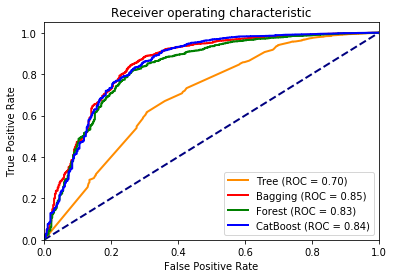

In [282]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='Tree (ROC = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr[1], tpr[1], color='r',
         lw=2, label='Bagging (ROC = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='g',
         lw=2, label='Forest (ROC = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='b',
         lw=2, label='CatBoost (ROC = %0.2f)' % roc_auc[3])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()